In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Indice

1- Analisis exploratorio del Data Frame PROMOCIONES

2- Analisis exploratorio del Data Frame VENTAS

3- Detección de Outliers

4- Unión de las tablas promociones y ventas

5- Redemption Rate simple

6- Redemption Rate Real

7- Comparar el volumen total y el volumen promedio. 

8- Análisis del desempeño del algoritmo

9- Desempeño del algoritmo en distintos clusters




In [3]:
promociones = pd.read_csv('PROMOCIONES.csv')
ventas = pd.read_csv('VENTAS.csv')

In [4]:
promociones

,SKU,UID_PROMO_DESIGN_ID,POC_ID,PROMO_ID,PERIOD_START_DT,PERIOD_END_DT,MEASUREMENT_GROUP,DISCOUNT,MIN_QTY,MAX_QTY
0,24880,6568a24a019dca56d52730cd,469431,c1c59adc-35c7-4520-bf07-a19163d44d9a,2023-12-01,2023-12-07,Group 1,4.0,9,999
1,24879,6568a24a019dca56d52730cd,457337,e09fae1d-3ae1-4957-b636-c3410eec3a72,2023-12-01,2023-12-07,Group 1,4.0,12,999
2,18354,6568a24a019dca56d52730cd,469355,8c4f2298-3f8f-46ab-9911-fa118206843c,2023-12-01,2023-12-07,Group 1,4.0,6,999
3,17932,6568a24a019dca56d52730cd,464233,f6d78d05-0c95-49c5-8f3b-518dcc89e1cd,2023-12-01,2023-12-07,Group 1,4.0,17,999
4,28315,6568a24a019dca56d52730cd,468647,50f779c1-a74b-49a3-b839-58079a0665dc,2023-12-01,2023-12-07,Group 1,4.0,13,999
...,...,...,...,...,...,...,...,...,...,...
567939,24372,6568a24a019dca56d52730cd,102521,84f95f6a-f9f3-4761-9ef5-e40d1bb06adc,2023-12-01,2023-12-07,Group 0,2.0,3,5
567940,2854,6568a24a019dca56d52730cd,102521,84f95f6a-f9f3-4761-9ef5-e40d1bb06adc,2023-12-01,2023-12-07,Group 0,4.0,6,999
567941,24372,6568a24a019dca56d52730cd,102521,b55be910-9974-4b42-86c6-b33f468ca5bd,2023-12-15,2023-12-21,Group 0,4.0,6,999
567942,24882,6568a24a019dca56d52730cd,102521,b55be910-9974-4b42-86c6-b33f468ca5bd,2023-12-15,2023-12-21,Group 0,2.0,3,5


In [5]:
ventas

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
0,429592,20230303,24934,0.00000,0.0
1,431861,20230314,21683,0.01980,1.0
2,438683,20230309,22390,0.11352,4.0
3,437398,20230316,17991,0.05676,2.0
4,186402,20230314,19019,0.12000,1.0
...,...,...,...,...,...
442647,365796,20230912,24880,0.11700,1.0
442648,445996,20231010,20992,0.11352,4.0
442649,428649,20231017,25059,0.04380,1.0
442650,39966,20231010,7026,0.12000,1.0


## 1- Exploración de Data Frame PROMOCIONES

In [6]:
print('Cantidad de clientes a los que se le ofrece la promoción:', promociones.POC_ID.nunique())

Cantidad de clientes a los que se le ofrece la promoción: 2268


In [7]:
print('La cantidad de SKU distintos en promociones es:', promociones.SKU.nunique())

La cantidad de SKU distintos en promociones es: 43


El campo "UID_PROMO_DESIGN_ID" solo tiene un elemento y este se repite para todos los registros. Al no tener valor para el análisis esta columna, se elimina.

In [8]:
print('Elementos distintos columna "UID_PROMO_DESIGN_ID":', promociones.UID_PROMO_DESIGN_ID.nunique())

Elementos distintos columna "UID_PROMO_DESIGN_ID": 1


In [9]:
# Elimino columna UID_PROMO_DESIGN_ID
promociones.drop(['UID_PROMO_DESIGN_ID'], axis=1, inplace= True)


In [10]:
#Se cambia el formato de la fecha a datatime

promociones.PERIOD_START_DT = pd.to_datetime(promociones.PERIOD_START_DT.astype(str), errors='coerce')
promociones.PERIOD_END_DT = pd.to_datetime(promociones.PERIOD_END_DT.astype(str), errors='coerce')

In [11]:

print('En la columna "period_start_DT" las fechas van de :',promociones.PERIOD_START_DT.min(), 'a', promociones.PERIOD_START_DT.max())
print('En la columna "period_end_DT", las fechas van de:', promociones.PERIOD_END_DT.min(), 'a', promociones.PERIOD_END_DT.max())


En la columna "period_start_DT" las fechas van de : 2023-12-01 00:00:00 a 2023-12-15 00:00:00
En la columna "period_end_DT", las fechas van de: 2023-12-07 00:00:00 a 2023-12-21 00:00:00


Puede verse que en la columna MEASURE_GROUP los registros _solo_ están clasificados como Group 1, Group 0 y Group 6 Outliers. Segun el enunciado, Group 1 es el de tratamiento y Group 0 es el de control. El tercer grupo 'Group 6 Outliers' tiene 2064 elementos y el 0.4 % de todos los registros totales. En el enunciado se solicita eliminar este grupo.

In [12]:
promociones.MEASUREMENT_GROUP.unique()

array(['Group 1', 'Group 6 Outliers', 'Group 0'], dtype=object)

In [13]:
print('Cantidad de registros Group 6 Outliers:', promociones.MEASUREMENT_GROUP.loc[promociones.MEASUREMENT_GROUP=='Group 6 Outliers'].count(), 'Porcentaje del total: ' ,
      promociones.MEASUREMENT_GROUP.loc[promociones.MEASUREMENT_GROUP=='Group 6 Outliers'].count()/len(promociones)*100)

Cantidad de registros Group 6 Outliers: 2064 Porcentaje del total:  0.36341611144760755


In [14]:
#Drop elementos "Group 6 Outliers"
promociones.drop(promociones[promociones.MEASUREMENT_GROUP=='Group 6 Outliers'].index, inplace=True)

In [15]:
promociones.MEASUREMENT_GROUP.replace(['Group 0', 'Group 1'], [0,1], inplace=True)

In [16]:
promociones.MEASUREMENT_GROUP.value_counts()

MEASUREMENT_GROUP
0    291540
1    274340
Name: count, dtype: int64

In [17]:
promociones.loc[promociones.MEASUREMENT_GROUP==1].nunique()

SKU                    43
POC_ID               1130
PROMO_ID               70
PERIOD_START_DT         3
PERIOD_END_DT           3
MEASUREMENT_GROUP       1
DISCOUNT                2
MIN_QTY                32
MAX_QTY                 2
dtype: int64

In [18]:
promociones.loc[promociones.MEASUREMENT_GROUP==0].nunique()

SKU                    43
POC_ID               1130
PROMO_ID                3
PERIOD_START_DT         3
PERIOD_END_DT           3
MEASUREMENT_GROUP       1
DISCOUNT                2
MIN_QTY                 2
MAX_QTY                 2
dtype: int64

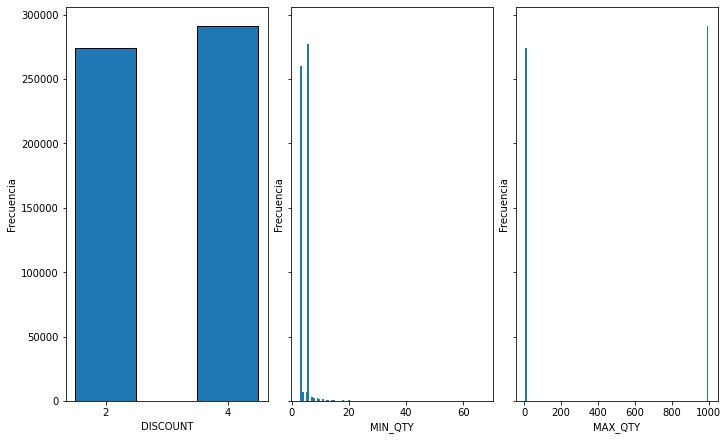

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6), sharey=True, constrained_layout=True)

# Grafico 1
# Gráfico 1: Histograma de la columna 'DISCOUNT'

bins = [1.5, 2.5, 3.5, 4.5]
axs[0].hist(promociones['DISCOUNT'], bins=bins, edgecolor='black')
axs[0].set_xlabel("DISCOUNT")
axs[0].set_ylabel("Frecuencia")
axs[0].set_xticks([2.0, 4.0])

# Grafico 2
axs[1].hist(promociones['MIN_QTY'], bins=100)
axs[1].set_xlabel("MIN_QTY")
axs[1].set_ylabel("Frecuencia")

# Grafico 3
axs[2].hist(promociones['MAX_QTY'], bins=100)
axs[2].set_xlabel("MAX_QTY")
axs[2].set_ylabel("Frecuencia")

plt.savefig('Outliers_PROMOCIONES', dpi=300, facecolor='white');

#fig.suptitle('Detección de outliers')

plt.show()





In [20]:

discount = promociones['DISCOUNT'].value_counts()
print(discount)

min_qty = promociones['MIN_QTY'].value_counts()
print(min_qty)

max_qty = promociones['MAX_QTY'].value_counts()
print(max_qty)


DISCOUNT
4.0    291540
2.0    274340
Name: count, dtype: int64
MIN_QTY
6     276963
3     260322
5       7138
4       6880
7       2924
8       2021
9       1935
11      1204
10      1118
12       860
13       731
18       516
14       430
15       387
20       387
21       301
17       301
28       258
16       215
23       172
19       129
26        86
22        86
39        86
25        86
24        86
67        43
37        43
57        43
30        43
32        43
43        43
Name: count, dtype: int64
MAX_QTY
999    291540
5      274340
Name: count, dtype: int64


In [21]:
print('grupo 1', promociones.loc[(promociones['MEASUREMENT_GROUP']== 1)].MAX_QTY.value_counts())
print('grupo 1', promociones.loc[(promociones['MEASUREMENT_GROUP']== 1)].MIN_QTY.value_counts())

grupo 1 MAX_QTY
999    145770
5      128570
Name: count, dtype: int64
grupo 1 MIN_QTY
6     131193
3     114552
5       7138
4       6880
7       2924
8       2021
9       1935
11      1204
10      1118
12       860
13       731
18       516
14       430
15       387
20       387
21       301
17       301
28       258
16       215
23       172
19       129
26        86
22        86
39        86
25        86
24        86
67        43
37        43
57        43
30        43
32        43
43        43
Name: count, dtype: int64


In [22]:
print('grupo 0',promociones.loc[(promociones['MEASUREMENT_GROUP']== 0)].MAX_QTY.value_counts())
print('grupo 0',promociones.loc[(promociones['MEASUREMENT_GROUP']== 0)].MIN_QTY.value_counts())


grupo 0 MAX_QTY
999    145770
5      145770
Name: count, dtype: int64
grupo 0 MIN_QTY
6    145770
3    145770
Name: count, dtype: int64


Las promociones del grupo 1 tienen mucha variedad de valores mínimos, pero al igual que los del grupo 0, solo dos tipos de valores máximos: 5 y 999. Las promociones del grupo 0 soslo tienen 2 valores de MIN_QTY, 3 y 6.

In [23]:
promociones.loc[promociones['MIN_QTY']>18].MEASUREMENT_GROUP.value_counts()

MEASUREMENT_GROUP
1    1935
Name: count, dtype: int64

Observar que **todos** los valores atipicos de la tabla promociones, pertenecen a promociones del grupo 1.

In [24]:
promociones.loc[promociones['MIN_QTY']>18].describe()

,SKU,POC_ID,PERIOD_START_DT,PERIOD_END_DT,MEASUREMENT_GROUP,DISCOUNT,MIN_QTY,MAX_QTY
count,1935.000000,1935.000000,1935,1935,1935.0,1935.0,1935.000000,1935.0
mean,22606.395349,428459.088889,2023-12-03 11:44:00.000000256,2023-12-09 11:44:00,1.0,4.0,26.266667,999.0
min,2854.000000,57159.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,1.0,4.0,19.000000,999.0
25%,18354.000000,432243.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,1.0,4.0,20.000000,999.0
50%,24248.000000,442119.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,1.0,4.0,23.000000,999.0
75%,25059.000000,461447.000000,2023-12-08 00:00:00,2023-12-14 00:00:00,1.0,4.0,28.000000,999.0
max,61676.000000,468167.000000,2023-12-15 00:00:00,2023-12-21 00:00:00,1.0,4.0,67.000000,999.0
std,7830.719734,71991.762607,NaN,NaN,0.0,0.0,9.648218,0.0


In [25]:
print('valores unicos de SKU sobre valores atípicos', promociones.loc[promociones['MIN_QTY']>18].SKU.nunique())
print('cantidad de clientes sobre valores atípicos', promociones.loc[promociones['MIN_QTY']>18].POC_ID.nunique())

valores unicos de SKU sobre valores atípicos 43
cantidad de clientes sobre valores atípicos 37


## 2- Exploración de Data Frame VENTAS

In [26]:
ventas.sample(10)

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
386509,410852,20230201,24932,0.11352,4.0
264102,389581,20230113,17991,0.02838,1.0
84508,459867,20230120,24882,0.08520,2.0
3246,394988,20230311,2201,0.05676,2.0
55075,146466,20230911,25059,0.08760,2.0
97001,462684,20230904,7038,0.12000,1.0
378922,399467,20230119,7651,0.05676,2.0
224182,436168,20230809,19253,0.12000,1.0
133781,438156,20230523,24880,0.23400,2.0
224727,445738,20230831,7038,0.36000,3.0


In [27]:
ventas.ORDER_DATE = pd.to_datetime(ventas.ORDER_DATE.astype(str), format='%Y%m%d', errors='coerce')

Debido a que la informacion que se tiene de las promociones son durante el mes de diciembre del 2023, se toman solo del dataframe ventas, las fechas de ese mes.

In [28]:
# Se seleccionan registros de ventas con fecha anterior a 2023-12-1 y posterior a 2023-12-31
ventas_dic_23 = ventas.drop(ventas[(ventas.ORDER_DATE<'2023-12-01') | (ventas.ORDER_DATE>'2023-12-31')].index)

In [29]:
ventas_dic_23.nunique()

POC_ID          2106
ORDER_DATE        31
SKU              155
TOTAL_VOLUME     385
UNIDADES         130
dtype: int64

In [30]:
len(ventas_dic_23)

37307

In [31]:
ventas_dic_23.describe()

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
count,37307.000000,37307,37307.000000,37307.000000,3.730700e+04
mean,391379.872330,2023-12-16 14:56:01.749805312,20026.629560,0.183264,2.362742e+00
min,22247.000000,2023-12-01 00:00:00,2110.000000,0.000000,-2.775558e-16
25%,382530.000000,2023-12-11 00:00:00,16667.000000,0.042600,1.000000e+00
50%,429592.000000,2023-12-16 00:00:00,19399.000000,0.113520,1.000000e+00
75%,451846.000000,2023-12-23 00:00:00,27583.000000,0.120000,2.000000e+00
max,677317.000000,2023-12-31 00:00:00,30286.000000,25.440000,2.600000e+02
std,105220.597641,NaN,8306.182091,0.613062,5.777071e+00


In [32]:
ventas.describe()

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
count,442652.000000,442652,442652.000000,442652.000000,4.426520e+05
mean,389784.113116,2023-06-19 05:50:21.465169408,17977.216362,0.160061,2.049487e+00
min,22247.000000,2022-12-01 00:00:00,2110.000000,0.000000,-2.775558e-16
25%,382530.000000,2023-03-04 00:00:00,7651.000000,0.042600,1.000000e+00
50%,429428.000000,2023-06-22 00:00:00,19019.000000,0.113520,1.000000e+00
75%,449502.000000,2023-10-05 00:00:00,24932.000000,0.120000,2.000000e+00
max,677317.000000,2024-01-06 00:00:00,30286.000000,78.000000,6.500000e+02
std,105447.797120,NaN,7900.856307,0.475106,4.387551e+00


In [33]:
ventas.SKU.nunique()

257

In [34]:
ventas_dic_23.SKU.nunique()

155

Durante el mes de diciembre del 2023, se vendieron 155 productos distintos.

In [35]:
print('Clientes ventas:', ventas.POC_ID.nunique())
print('Clientes ventas diciembre 2023:',ventas_dic_23.POC_ID.nunique())

Clientes ventas: 2268
Clientes ventas diciembre 2023: 2106


Durante el mes de diciembre del 2023 se vendieron productos a 2106 clientes.


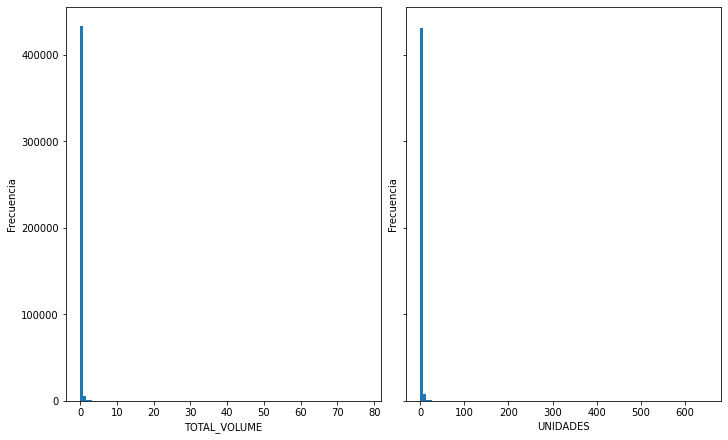

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True, constrained_layout=True)

# Grafico 1
axs[0].hist(ventas['TOTAL_VOLUME'], bins=100)
axs[0].set_xlabel("TOTAL_VOLUME")
axs[0].set_ylabel("Frecuencia")

# Grafico 2
axs[1].hist(ventas['UNIDADES'], bins=100)
axs[1].set_xlabel("UNIDADES")
axs[1].set_ylabel("Frecuencia")

plt.savefig('Outliers_ventas', dpi=300, facecolor='white');


#fig.suptitle('Detección de outliers')

plt.show()



In [39]:
ventas



TOTAL_VOLUME = ventas_dic_23['TOTAL_VOLUME'].value_counts()
print(TOTAL_VOLUME)

UNIDADES = ventas_dic_23['UNIDADES'].value_counts()
print(UNIDADES)




TOTAL_VOLUME
0.12000    6328
0.02838    4577
0.11352    3563
0.05676    2961
0.24000    2110
           ... 
0.34000       1
1.63800       1
0.95000       1
0.97920       1
1.00800       1
Name: count, Length: 385, dtype: int64
UNIDADES
1.000000     19442
2.000000      7858
3.000000      2814
4.000000      2731
0.000000      1385
             ...  
41.000000        1
2.833333         1
27.000000        1
4.500000         1
61.000000        1
Name: count, Length: 130, dtype: int64


In [40]:
ventas_dic_23.describe()

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
count,37307.000000,37307,37307.000000,37307.000000,3.730700e+04
mean,391379.872330,2023-12-16 14:56:01.749805312,20026.629560,0.183264,2.362742e+00
min,22247.000000,2023-12-01 00:00:00,2110.000000,0.000000,-2.775558e-16
25%,382530.000000,2023-12-11 00:00:00,16667.000000,0.042600,1.000000e+00
50%,429592.000000,2023-12-16 00:00:00,19399.000000,0.113520,1.000000e+00
75%,451846.000000,2023-12-23 00:00:00,27583.000000,0.120000,2.000000e+00
max,677317.000000,2023-12-31 00:00:00,30286.000000,25.440000,2.600000e+02
std,105220.597641,NaN,8306.182091,0.613062,5.777071e+00


In [ ]:
ventas.loc[ventas.TOTAL_VOLUME>7].describe()

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
count,293.000000,293,293.000000,293.000000,293.000000
mean,437760.873720,2023-08-01 23:35:25.597269504,16202.488055,12.589197,110.451081
min,142908.000000,2022-12-02 00:00:00,2218.000000,7.020000,59.000000
25%,433940.000000,2023-05-09 00:00:00,7038.000000,9.600000,89.000000
50%,437341.000000,2023-09-11 00:00:00,7634.000000,12.000000,100.000000
75%,453277.000000,2023-11-22 00:00:00,27488.000000,12.840000,108.000000
max,467899.000000,2024-01-06 00:00:00,29790.000000,78.000000,650.000000
std,28703.638526,NaN,9992.232399,5.925068,58.537902


In [ ]:
ventas.loc[ventas.UNIDADES>25].describe()

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
count,1561.000000,1561,1561.000000,1561.000000,1561.000000
mean,425721.621397,2023-07-07 03:48:46.585522176,16257.548366,5.871280,55.528881
min,27085.000000,2022-12-01 00:00:00,2201.000000,0.529760,26.000000
25%,432243.000000,2023-02-27 00:00:00,7038.000000,3.600000,33.000000
50%,440636.000000,2023-08-09 00:00:00,16811.000000,5.400000,50.000000
75%,453277.000000,2023-10-26 00:00:00,26567.000000,6.360000,55.000000
max,469278.000000,2024-01-06 00:00:00,30286.000000,78.000000,650.000000
std,66231.051481,NaN,9276.907695,4.414694,38.995262


La mayoria de los valores de "TOTAL_VOLUME" son valores menores a 5. Para el caso de "UNIDADES", la mayoria de las unidades por compra son menos de 25.

## 3- Detección de Outliers

De los analisis anteriores, se ve que puede haber outliers en la tabla ventas en las columnas 'TOTAL_VOLUME', 'UNIDADES', y en la tabla promociones en 'MIN_QTY'.

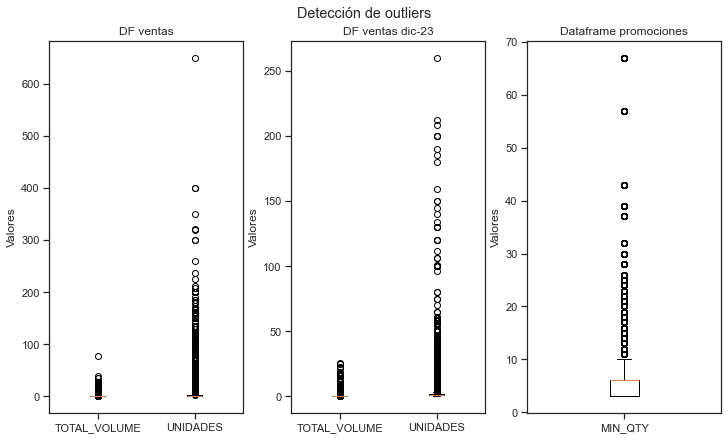

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6), constrained_layout=True)

# Grafico 1
axs[0].boxplot(ventas[['TOTAL_VOLUME', 'UNIDADES']])
axs[0].set_ylabel('Valores')
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['TOTAL_VOLUME', 'UNIDADES'])
axs[0].set_title('DF ventas')

# Grafico 2
axs[1].boxplot(ventas_dic_23[['TOTAL_VOLUME', 'UNIDADES']])
axs[1].set_ylabel('Valores')
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['TOTAL_VOLUME', 'UNIDADES'])
axs[1].set_title('DF ventas dic-23')

# Grafico 2
axs[2].boxplot(promociones[['MIN_QTY']])
axs[2].set_ylabel('Valores')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['MIN_QTY'])
axs[2].set_title('Dataframe promociones')

fig.suptitle('Detección de outliers')
plt.savefig('Outliers_boxplot', dpi=300, facecolor='white');
plt.show()


In [ ]:
#funcion para eliminar outliers
def elimino_outliers(df, campo, k):
    iqr = df[campo].quantile(0.75) - df[campo].quantile(0.25) # rango intercuartilico
    #iqr = ventas['TOTAL_VOLUME'].quantile(0.75) - ventas['TOTAL_VOLUME'].quantile(0.25)
   
    df= df.drop(df[(df[campo] < df[campo].quantile(0.25) - k * iqr) | 
                   (df[campo] > df[campo].quantile(0.75) + k * iqr)
                   ].index)
    return df

In [ ]:
#Los dataframes con ouliers dropeados tienen el subindice o
ventas_o = elimino_outliers(ventas, 'UNIDADES', 3)
ventas_o = elimino_outliers(ventas, 'TOTAL_VOLUME', 3)
promociones_o = elimino_outliers(promociones,'MIN_QTY', 3)

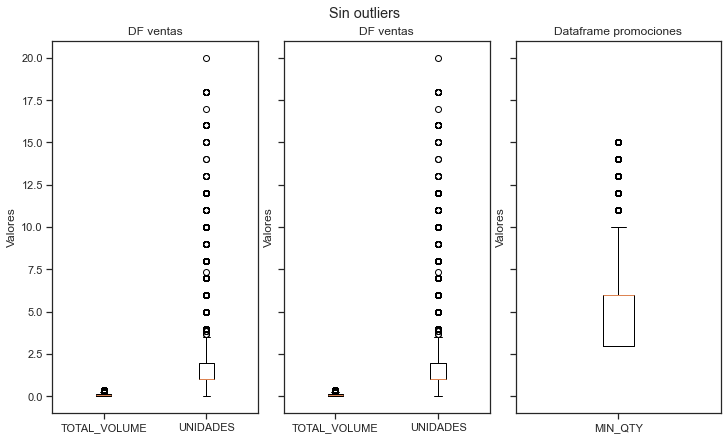

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6), sharey=True, constrained_layout=True)

axs[0].boxplot(ventas_o[['TOTAL_VOLUME', 'UNIDADES']])
axs[0].set_ylabel('Valores')
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['TOTAL_VOLUME', 'UNIDADES'])
axs[0].set_title('DF ventas')

axs[1].boxplot(ventas_o[['TOTAL_VOLUME', 'UNIDADES']])
axs[1].set_ylabel('Valores')
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['TOTAL_VOLUME', 'UNIDADES'])
axs[1].set_title('DF ventas')


axs[2].boxplot(promociones_o[['MIN_QTY']])
axs[2].set_ylabel('Valores')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['MIN_QTY'])
axs[2].set_title('Dataframe promociones')
fig.suptitle('Sin outliers')
plt.savefig('SIN_Outliers_boxplot', dpi=300, facecolor='white');
plt.show()


 Ademas considerar que se tomo k=3. 

## 4- Unión de las tablas promociones y ventas
Como determinar si una venta es debido a una promoción o no?

Interpreto que para saber si la venta es producto de una promoción, se deben cumplir las siguientes condiciones al mismo tiempo:
- El SKU de la tabla venta corresponde con el SKU de la promoción.
- La fecha de la orden (tabla venta), corresponde con el período de la promoción.
- La cantidad de venta para esa orden (unidades en tabla venta), esta en el rango de MIN_QTY y MAX_QTY de unidades de la tabla promoción.

Utilizaré para unir las tablas Merge de pandas. El merge se realizará sobre las columnas SKU y POC_ID. 

¿Por qué uso inner y no left o right?

- Utiizando **inner** solo tendremos en la tabla resultante los registros  SKU y (es importante **y** ) POC_ID (ID de clientes) que coincididan. 
- Si utiizáramos **left**, tendriamos en la tabla resultante algunos SKU que no entraron en promocion.
- Por ultimo, en **right**, tendriamos SKU s y POC_ID que no se hayan correspondido con ventas.

En la consigna solicitan calcular métricas sobre clientes. No sobre ventas. Si fueran sobre ventas, deberia utilizar left. Ahi entrarían todas las ventas mas alla de que no haya habido una promocion asociada.


In [ ]:
ventas_dic_23_o = ventas_o.drop(ventas_o[(ventas_o.ORDER_DATE<'2023-12-01') | (ventas_o.ORDER_DATE>'2023-12-31')].index)
#merge de las tablas:
ven_dic_23_y_prom = pd.merge(ventas_dic_23, promociones, on=['SKU', 'POC_ID'], how='inner')
ven_dic_23_y_prom_o = pd.merge(ventas_dic_23_o, promociones_o, on=['SKU', 'POC_ID'], how='inner')


In [ ]:
#Filtrado de las redenciones:
#tabla con Outliers
ven_dic_23_y_prom['REDEMPTION'] = False
ven_dic_23_y_prom.loc[((ven_dic_23_y_prom['ORDER_DATE'] >= ven_dic_23_y_prom['PERIOD_START_DT']) & (ven_dic_23_y_prom['ORDER_DATE']<=ven_dic_23_y_prom['PERIOD_END_DT'])
                ), 'REDEMPTION'] = True

#Tabla libre de outliers
ven_dic_23_y_prom_o['REDEMPTION'] = False
ven_dic_23_y_prom_o.loc[((ven_dic_23_y_prom_o['ORDER_DATE'] >= ven_dic_23_y_prom_o['PERIOD_START_DT']) & (ven_dic_23_y_prom_o['ORDER_DATE']<=ven_dic_23_y_prom_o['PERIOD_END_DT'])
                ), 'REDEMPTION'] = True



In [ ]:
# Creo una columma llamada "ES_PROMOCION" con valores booleanos. Considerando las condiciones que se mencionaron para que una una promocion se corresponda con una venta
ven_dic_23_y_prom['ES_PROMOCION'] = False
ven_dic_23_y_prom.loc[((ven_dic_23_y_prom['ORDER_DATE'] >= ven_dic_23_y_prom['PERIOD_START_DT']) & (ven_dic_23_y_prom['ORDER_DATE']<=ven_dic_23_y_prom['PERIOD_END_DT'])&
                (ven_dic_23_y_prom['UNIDADES'] >= ven_dic_23_y_prom['MIN_QTY']) & (ven_dic_23_y_prom['UNIDADES']<=ven_dic_23_y_prom['MAX_QTY'])), 'ES_PROMOCION'] = True

ven_dic_23_y_prom_o['ES_PROMOCION'] = False
ven_dic_23_y_prom_o.loc[((ven_dic_23_y_prom_o['ORDER_DATE'] >= ven_dic_23_y_prom_o['PERIOD_START_DT']) & (ven_dic_23_y_prom_o['ORDER_DATE']<=ven_dic_23_y_prom_o['PERIOD_END_DT'])&
                (ven_dic_23_y_prom_o['UNIDADES'] >= ven_dic_23_y_prom_o['MIN_QTY']) & (ven_dic_23_y_prom_o['UNIDADES']<=ven_dic_23_y_prom_o['MAX_QTY'])), 'ES_PROMOCION'] = True

Voy a calcular las siguientes métricas para el grupo 0, grupo 1 y el total:
- número de redenciones: aquellas ventas de productos que hayan sido ofrecidos por promociones, y que se hayan adquirido en la fecha de la promoción, pero que no tengan que cumplir necesariamente la condicion de MIN_QTY.
- número de promociones aceptadas: Aquellas ventas que cumplan con las condiciones de las promociones y entonces accedieron al beneficio del descuento, para grupo 1, 0 y en general.
- número de compras totales: cantidad total de ventas en el período.
- número de clientes redimidos (grupo 0 y 1)
- número de clientes que adquirieron promoción (grupo 1 y 0)
- número de clientes de clientes que hayan realizado compras.

Para de este modo determinar:
- redemption rate simple

$$
\text{Redemption Rate Simple} = \frac{\text{Número de clientes redimidos}}{\text{Número de clientes promoción grupo}}
$$


- redemption rate REAL
$$
\text{Redemption Rate Real} = \frac{\text{Número de clientes que adquirieron promoción}}{\text{Número de clientes promocion grupo}}
$$


Respecto al denominador de ambos rates, se toma el número de clientes filtrando de la tabla promociones el grupo 1 o 0 según corresponda.

In [ ]:
# Con esta funcion se calculan las redenciones
def redemption(df):
        # num de compras
    num_redenciones_g1 = df.loc[(df['REDEMPTION']==True)&(df['MEASUREMENT_GROUP']==1)].shape[0]
    num_redenciones_g0 = df.loc[(df['REDEMPTION']==True)&(df['MEASUREMENT_GROUP']==0)].shape[0]
    num_redenciones_aceptadas = df.loc[(df['REDEMPTION']==True)].shape[0]
    promociones_aceptadas_g1= df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==1)].shape[0]
    promociones_aceptadas_g0 = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==0)].shape[0]
    promociones_aceptadas = df.loc[df['ES_PROMOCION']==True].shape[0]
    compras_totales = df.shape[0]

    #num de clientes
    num_clientes_redenciones_g1 = df.loc[(df['REDEMPTION']==True)&(df['MEASUREMENT_GROUP']==1)].POC_ID.nunique()
    num_clientes_redenciones_g0 = df.loc[(df['REDEMPTION']==True)&(df['MEASUREMENT_GROUP']==0)].POC_ID.nunique()
    num_clientes_redenciones_aceptadas = df.loc[(df['REDEMPTION']==True)].POC_ID.nunique()
    num_clientes_promociones_aceptadas_g1= df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==1)].POC_ID.nunique()
    num_clientes_promociones_aceptadas_g0 = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==0)].POC_ID.nunique()
    num_clientes_promociones_aceptadas = df.loc[df['ES_PROMOCION']==True].POC_ID.nunique()
    num_clientes_compras_totales = df.POC_ID.nunique()

    # num clientes por grupo

    num_clientes_promocion_g1 = promociones.loc[promociones.MEASUREMENT_GROUP==1].POC_ID.nunique()
    num_clientes_promocion_g0 = promociones.loc[promociones.MEASUREMENT_GROUP==0].POC_ID.nunique()
    num_clientes_promocion = promociones.POC_ID.nunique()

    #calculo redemption rate

    redemption_rate_g1 = num_clientes_redenciones_g1/num_clientes_promocion_g1
    redemption_rate_g0 = num_clientes_redenciones_g0/num_clientes_promocion_g0
    redemption_rate_tot = num_clientes_redenciones_aceptadas/num_clientes_promocion
    redemption_rate_REAL_g1 = num_clientes_promociones_aceptadas_g1/num_clientes_promocion_g1
    redemption_rate_REAL_g0 = num_clientes_promociones_aceptadas_g0/num_clientes_promocion_g0
    redemption_rate_REAL = num_clientes_promociones_aceptadas/num_clientes_promocion


    print('redemption_rate_simple_g1', redemption_rate_g1)
    print('redemption_rate_simple_g0', redemption_rate_g0)
    print('redemption_rate_simple_tot (ambos grupos)', redemption_rate_tot)

    print('redemption_rate_REAL_g1', redemption_rate_REAL_g1)
    print('redemption_rate_REAL_g0', redemption_rate_REAL_g0)
    print('redemption_rate_REAL (ambos grupos)', redemption_rate_REAL)


In [ ]:
#Con Outliers
redemption(ven_dic_23_y_prom)

redemption_rate_simple_g1 0.5557522123893806
redemption_rate_simple_g0 0.5495575221238939
redemption_rate_simple_tot (ambos grupos) 0.5526548672566372
redemption_rate_REAL_g1 0.1
redemption_rate_REAL_g0 0.12212389380530973
redemption_rate_REAL (ambos grupos) 0.11106194690265486


In [ ]:
#Sin Outliers
redemption(ven_dic_23_y_prom_o)

redemption_rate_simple_g1 0.5415929203539823
redemption_rate_simple_g0 0.5345132743362832
redemption_rate_simple_tot (ambos grupos) 0.5380530973451327
redemption_rate_REAL_g1 0.03274336283185841
redemption_rate_REAL_g0 0.06814159292035399
redemption_rate_REAL (ambos grupos) 0.050442477876106194


## 5- Redemption Rate simple

En el enunciado solicitan:

_Calcular la redemption rate SIMPLE: proporción de clientes que al menos compraron 1 producto de la promo (sin importar la cantidad)._

De acuerdo a esta solicitud, interpreto que los clientes redimidos son aquellos que adquieren un producto de la promo incluso sin haber accedido al descuento de la promocion. Es decir, adquirieron los productos de la promocion y en la fecha de vigencia, pero no necesariamente alcanzaron la cantidad minima MIN_QTY.

Para realizar los calculos, dada la característica de los outliers, calculo con outliers y sin outliers.

**Con outliers:**


- Redemption rate simple grupo 1: 55.6 %
- Redemption rate simple grupo 0: 55.0 %
- Redemption rate simple ambos grupos: 55.3 % 

**Sin outliers:**

- Redemption rate simple grupo 1: 54.2 %
- Redemption rate simple grupo 0: 53.5. %
- Redemption rate simple ambos grupos: 53.8 % 



## 6- Redemption Rate Real

En el enunciado solicitan:

_Calcular la redemption rate REAL: % clientes que compraron una cantidad de unidades mayor o igual a la asignada por el algoritmo.._

De acuerdo a lo indicado, para que los clientes hayan accedido a la promocion, deben haber realizado una compra de un producuto ofrecido en promoción, en el rango de validez de fechas y por una cantidad mayor a la mínima para ingresar a la promocion (MIN_QTY) y menor a la máxima (MAX_QTY).

**Con Outliers**

- Redemption_rate_REAL_g1: 10.0 %
- Redemption_rate_REAL_g0 12.2 %
- Redemption_rate_REAL (ambos grupos) 11.11 %

**Sin Outliers**

- Redemption_rate_REAL_g1 3.3 %
- Redemption_rate_REAL_g0 6.81 %
- Redemption_rate_REAL (ambos grupos) 5.0 %

En este caso, puede verse la influencia de los Outliers, sobre todo afectan a las ventas del grupo 1.




## 7- Comparar el volumen total y el volumen promedio. 

En el enunciado solicitan previamente eliminar outliers. Desde mi punto de vista aporta valor comparar calculos considerando y sin considerar Outliers.

### Cálculo del volumen medio:

Observando el volumen medio por compra, el grupo 0 tiene mejor desempeño tambien en este aspecto. 

El volumen medio de los redimidos REAL es del doble respecto a los redimidos. Esto de alguna forma era de esperarse y es bueno, ya que las promociones logran su objetivo de lograr mayores volúmenes de venta. El volumen medio del grupo 0 es mayor que el del 1 (4 % superior). 

Sin sacar los outliers, el grupo 1 tiene mucho mejor desempeño. El volumen medio para redimidos real es superior en un 33 % aproximadamente. 



In [ ]:
#Cálculo volumen medio sin outliers
# sin outliers
volumen_medio_group_1_o_r = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['REDEMPTION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].mean()
volumen_medio_group_0_o_r = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['REDEMPTION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].mean()
volumen_medio_group_1_o = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['ES_PROMOCION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].mean()
volumen_medio_group_0_o = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['ES_PROMOCION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].mean()
volumen_medio_sin_promo_o = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['REDEMPTION']==False)]['TOTAL_VOLUME'].mean()

print('Sin outliers')
print('Volumen medio clientes redimidos grupo 1:', volumen_medio_group_1_o_r)
print('Volumen medio clientes redimidos grupo 0:', volumen_medio_group_0_o_r)
print('Volumen medio grupo 1 redimidos real:', volumen_medio_group_1_o)
print('Volumen medio grupo 0 redimidos real:', volumen_medio_group_0_o)
print('Volumen medio no redimidos:', volumen_medio_sin_promo_o)
print('grupo 0 respecto a grupo 1', (volumen_medio_group_0_o-volumen_medio_group_1_o)/volumen_medio_group_1_o)

#Cálculo volumen medio con outliers

volumen_medio_group_1_r = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['REDEMPTION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].mean()
volumen_medio_group_0_r = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['REDEMPTION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].mean()
volumen_medio_group_1 = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['ES_PROMOCION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].mean()
volumen_medio_group_0 = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['ES_PROMOCION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].mean()
volumen_medio_sin_promo = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['REDEMPTION']==False)]['TOTAL_VOLUME'].mean()

print('Con Outliers')
print('Volumen medio clientes redimidos grupo 1:', volumen_medio_group_1_r)
print('Volumen medio clientes redimidos grupo 0:', volumen_medio_group_0_r)
print('Volumen medio grupo 1 redimidos real:', volumen_medio_group_1)
print('Volumen medio grupo 0 redimidos real:', volumen_medio_group_0)
print('Volumen medio no redimidos:', volumen_medio_sin_promo)
#print('grupo 0 respecto a grupo 1', (volumen_medio_group_0_o-volumen_medio_group_1_o)/volumen_medio_group_1_o)


Sin outliers
Volumen medio clientes redimidos grupo 1: 0.11729230683299198
Volumen medio clientes redimidos grupo 0: 0.1202526377118644
Volumen medio grupo 1 redimidos real: 0.2571192
Volumen medio grupo 0 redimidos real: 0.2684364444444444
Volumen medio no redimidos: 0.11997262466799966
grupo 0 respecto a grupo 1 0.044015555603955016
Con Outliers
Volumen medio clientes redimidos grupo 1: 0.15658342644320297
Volumen medio clientes redimidos grupo 0: 0.161494813469792
Volumen medio grupo 1 redimidos real: 0.7358704761904762
Volumen medio grupo 0 redimidos real: 0.556780843373494
Volumen medio no redimidos: 0.16948845664818069


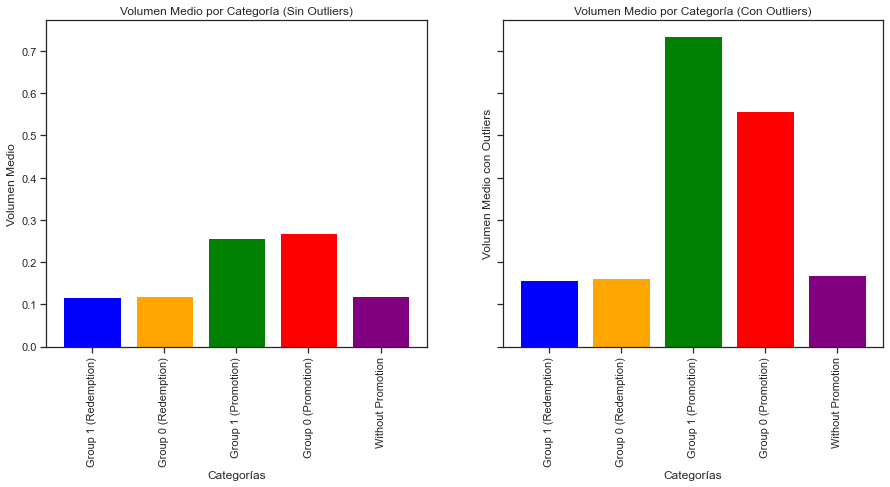

In [ ]:
# Categorías y valores sin outliers
categorias_sin_outliers = ['Group 1 (Redemption)', 'Group 0 (Redemption)', 'Group 1 (Promotion)', 'Group 0 (Promotion)', 'Without Promotion']
valores_sin_outliers = [volumen_medio_group_1_o_r, volumen_medio_group_0_o_r, volumen_medio_group_1_o, volumen_medio_group_0_o, volumen_medio_sin_promo_o]

# Categorías y valores con outliers
categorias_con_outliers = ['Group 1 (Redemption)', 'Group 0 (Redemption)', 'Group 1 (Promotion)', 'Group 0 (Promotion)', 'Without Promotion']
valores_con_outliers = [volumen_medio_group_1_r, volumen_medio_group_0_r, volumen_medio_group_1, volumen_medio_group_0, volumen_medio_sin_promo]

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Gráfico sin outliers
axs[0].bar(categorias_sin_outliers, valores_sin_outliers, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[0].set_xlabel('Categorías')
axs[0].set_ylabel('Volumen Medio')
axs[0].set_title('Volumen Medio por Categoría (Sin Outliers)')
axs[0].tick_params(axis='x', rotation=90)

# Gráfico con outliers
axs[1].bar(categorias_con_outliers, valores_con_outliers, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[1].set_xlabel('Categorías')
axs[1].set_ylabel('Volumen Medio con Outliers')
axs[1].set_title('Volumen Medio por Categoría (Con Outliers)')
axs[1].tick_params(axis='x', rotation=90)
plt.savefig('Volumen_medio', dpi=300, facecolor='white');
plt.show()


### Cálculo del volumen total 

El volumen total en el grupo 0 considerando los clientes redimidos es mayor en aproximandamente un 10 %. Pero considerando los clientes redimidos total, triplica al volumen del grupo 1.

Sin sacar los outliers, aqui también puede verse que el grupo 1 tiene mejor desempeño aunque no tan notorio como el en caso de volumen medio por compra. 
La mayoria del volumen total no es producto de ventas por promociones adquiridas.

In [ ]:
#Calculo volumen total sin outliers:
volumen_total_group_1_o_r = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['REDEMPTION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].sum()
volumen_total_group_0_o_r = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['REDEMPTION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].sum()
volumen_total_group_1_o = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['ES_PROMOCION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].sum()
volumen_total_group_0_o = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['ES_PROMOCION']==True) & (ven_dic_23_y_prom_o['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].sum()
volumen_total_sin_promo_o = ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o['REDEMPTION']==False)]['TOTAL_VOLUME'].sum()

print('calculo volumen total sin outliers')
print('Volumen total clientes redimidos grupo 1:', volumen_total_group_1_o_r)
print('Volumen total clientes redimidos grupo 0:', volumen_total_group_0_o_r)
print('Volumen total grupo 1 redimidos real:', volumen_total_group_1_o)
print('Volumen total grupo 0 redimidos real:', volumen_total_group_0_o)
print('Volumen total no redimidos:', volumen_total_sin_promo_o)

#Calculo volumen total con outliers
volumen_total_group_1_r = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['REDEMPTION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].sum()
volumen_total_group_0_r = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['REDEMPTION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].sum()
volumen_total_group_1 = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['ES_PROMOCION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].sum()
volumen_total_group_0 = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['ES_PROMOCION']==True) & (ven_dic_23_y_prom['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].sum()
volumen_total_sin_promo = ven_dic_23_y_prom.loc[(ven_dic_23_y_prom['REDEMPTION']==False)]['TOTAL_VOLUME'].sum()

print('Volumen total clientes redimidos grupo 1:', volumen_total_group_1_r)
print('Volumen total clientes redimidos grupo 0:', volumen_total_group_0_r)
print('Volumen total grupo 1 redimidos real:', volumen_total_group_1)
print('Volumen total grupo 0 redimidos real:', volumen_total_group_0)
print('Volumen total no redimidos:', volumen_total_sin_promo)


calculo volumen total sin outliers
Volumen total clientes redimidos grupo 1: 629.9769799999999
Volumen total clientes redimidos grupo 0: 681.1109399999999
Volumen total grupo 1 redimidos real: 12.85596
Volumen total grupo 0 redimidos real: 36.23892
Volumen total no redimidos: 4020.1626800000004
Volumen total clientes redimidos grupo 1: 924.9382999999999
Volumen total clientes redimidos grupo 0: 978.3355799999999
Volumen total grupo 1 redimidos real: 139.07952
Volumen total grupo 0 redimidos real: 184.85124
Volumen total no redimidos: 6265.140799999999


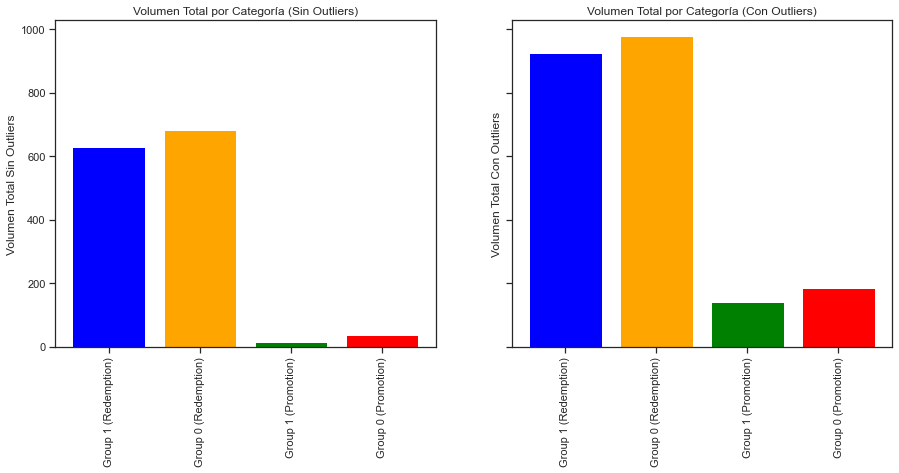

In [ ]:


# Categorías y valores sin outliers
categorias_sin_outliers = ['Group 1 (Redemption)', 'Group 0 (Redemption)', 'Group 1 (Promotion)', 'Group 0 (Promotion)']
valores_total_sin_outliers = [volumen_total_group_1_o_r, volumen_total_group_0_o_r, volumen_total_group_1_o, volumen_total_group_0_o]

# Categorías y valores con outliers
categorias_con_outliers = ['Group 1 (Redemption)', 'Group 0 (Redemption)', 'Group 1 (Promotion)', 'Group 0 (Promotion)']
valores_total_con_outliers = [volumen_total_group_1_r, volumen_total_group_0_r, volumen_total_group_1, volumen_total_group_0]


fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Gráfico sin outliers
axs[0].bar(categorias_sin_outliers, valores_total_sin_outliers, color=['blue', 'orange', 'green', 'red', 'purple'])
#axs[0].set_xlabel('Categorías')
axs[0].set_ylabel('Volumen Total Sin Outliers')
axs[0].set_title('Volumen Total por Categoría (Sin Outliers)')
axs[0].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad

# Gráfico con outliers
axs[1].bar(categorias_con_outliers, valores_total_con_outliers, color=['blue', 'orange', 'green', 'red', 'purple'])
#axs[1].set_xlabel('Categorías')
axs[1].set_ylabel('Volumen Total Con Outliers')
axs[1].set_title('Volumen Total por Categoría (Con Outliers)')
axs[1].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
plt.savefig('Volumen_total', dpi=300, facecolor='white');
plt.show()


## 7- Análisis del desempeño del algoritmo

Si se analiza el comportamiento histórico de compra de los clientes de cada grupo ¿En qué medida son alcanzables las cantidades mínimas exigidas por el algoritmo?

Para analizar el comportamiento histórico de los clientes, como los datos de promociones que se tienen son de diciembre del 2023, se analizará el comportamiento de los clientes en diciembre del 2022 por una cuestion de estacionalidad.

In [ ]:
ventas_dic_22 = ventas.loc[(ventas.ORDER_DATE >='2022-12-01') & (ventas.ORDER_DATE<='2022-12-31')]
ventas_dic_22_o = ventas.loc[(ventas_o.ORDER_DATE >='2022-12-01') & (ventas.ORDER_DATE<='2022-12-31')]


In [ ]:
# group_1 y group_0 son arrays que tienen a los clientes del grupo 1 y 0 respectivamente.
group_1 = promociones.loc[promociones.MEASUREMENT_GROUP==1]['POC_ID'].unique()
group_0 = promociones.loc[promociones.MEASUREMENT_GROUP==0]['POC_ID'].unique()


In [ ]:
ventas_dic_22_g1 = ventas_dic_22[ventas_dic_22['POC_ID'].isin(group_1)]
ventas_dic_22_g0 = ventas_dic_22[ventas_dic_22['POC_ID'].isin(group_0)]
ventas_dic_22_g1_o = ventas_dic_22_o[ventas_dic_22_o['POC_ID'].isin(group_1)]
ventas_dic_22_g0_o = ventas_dic_22_o[ventas_dic_22_o['POC_ID'].isin(group_0)]

In [ ]:
promociones_1 = promociones.loc[promociones.MEASUREMENT_GROUP==1]
promociones_0 = promociones.loc[promociones.MEASUREMENT_GROUP==0]
promociones_1_o = promociones_o.loc[promociones_o.MEASUREMENT_GROUP==1]
promociones_0_o = promociones_o.loc[promociones_o.MEASUREMENT_GROUP==0]


In [ ]:
print('media unidades vendidas dic 22 grupo 1', ventas_dic_22_g1.UNIDADES.mean())
print('media unidades vendidas dic 22 grupo 1 (sin outliers)', ventas_dic_22_g1_o.UNIDADES.mean())
print('media unidades vendidas dic 22 grupo 0', ventas_dic_22_g0.UNIDADES.mean())
print('media unidades vendidas dic 22 grupo 0 (sin outliers)', ventas_dic_22_g0_o.UNIDADES.mean())
print('media de MIN_QTY grupo 1 en promociones adquiridas (sin Outliers)' ,ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o.MEASUREMENT_GROUP==1) & (ven_dic_23_y_prom_o['ES_PROMOCION']==True)].MIN_QTY.mean())
print('media de MIN_QTY grupo 1 en promociones adquiridas' ,ven_dic_23_y_prom.loc[(ven_dic_23_y_prom.MEASUREMENT_GROUP==1) & (ven_dic_23_y_prom['ES_PROMOCION']==True)].MIN_QTY.mean())
print('media de MIN_QTY grupo 1' ,ven_dic_23_y_prom.loc[(ven_dic_23_y_prom.MEASUREMENT_GROUP==1)].MIN_QTY.mean())
print('media de MIN_QTY grupo 1 (sin Outliers)' , ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o.MEASUREMENT_GROUP==1)].MIN_QTY.mean())
print('media de MIN_QTY grupo 0 en promociones adquiridas' ,ven_dic_23_y_prom.loc[(ven_dic_23_y_prom.MEASUREMENT_GROUP==0) & (ven_dic_23_y_prom['ES_PROMOCION']==True)].UNIDADES.mean())
print('media de MIN_QTY grupo 0 en promociones adquiridas (sin Outliers)' ,ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o.MEASUREMENT_GROUP==0) & (ven_dic_23_y_prom_o['ES_PROMOCION']==True)].UNIDADES.mean())
print('media de MIN_QTY grupo 0' ,ven_dic_23_y_prom.loc[(ven_dic_23_y_prom.MEASUREMENT_GROUP==0)].MIN_QTY.mean())
print('media de MIN_QTY grupo 0 (sin outliers)' ,ven_dic_23_y_prom_o.loc[(ven_dic_23_y_prom_o.MEASUREMENT_GROUP==0)].MIN_QTY.mean())



media unidades vendidas dic 22 grupo 1 2.2577094224545684
media unidades vendidas dic 22 grupo 1 (sin outliers) 1.6478569584301572
media unidades vendidas dic 22 grupo 0 2.289677828889878
media unidades vendidas dic 22 grupo 0 (sin outliers) 1.6680100893787353
media de MIN_QTY grupo 1 en promociones adquiridas (sin Outliers) 3.74
media de MIN_QTY grupo 1 en promociones adquiridas 5.306878306878307
media de MIN_QTY grupo 1 5.99089917799027
media de MIN_QTY grupo 1 (sin Outliers) 5.3283249860879245
media de MIN_QTY grupo 0 en promociones adquiridas 5.451807228915663
media de MIN_QTY grupo 0 en promociones adquiridas (sin Outliers) 3.414814814814815
media de MIN_QTY grupo 0 4.5
media de MIN_QTY grupo 0 (sin outliers) 4.5


De nuevo aqui hay que separar el analisis en dos partes, sin Outliers, y con Outliers. 

Analisis sin outliers: 

La media de unidades compradas por los clientes de cada grupo en diciembre del 2022 es de:

- grupo 1 : 1.65
- grupo 0 : 1.67

Muy similares.

Mientras que la media de MIN_QTY es:

- grupo 1 : 5.33
- grupo 0 : 4.5

Ahora si observamos la media de MIN_QTY de promociones adquiridas, 3.74 y 3.42 respectivamente, se ve que esta medida está bastante por debajo de lo ofrecido. Es decir, la mayoria de las ventas se hicieron con compras con MIN_QTY bajos y por debajo de la media ofrecida.

Con Outliers el resultado es distinto y mas alentador:

La media de unidades compradas por los clientes de cada grupo en diciembre del 2022 es de:

- grupo 1 : 2.26
- grupo 0 : 2.29

Muy similares entre ellos tambien tambiém.

Mientras que la media de MIN_QTY ofrecida es:

- grupo 1 : 6.00
- grupo 0 : 4.50 (la misma que sin outliers, recordar de mas arriba que los outliers en MIN_QTY son solo de grupo 1)

La media de MIN_QTY en las promociones adquiridas es de 5.30 y 5.45 para clientes del grupo 1 y 0 respectivamente. Estos valores estan mas cercanos a las medias de MIN_QTY ofrecidos y hacen pensar que los valores de MIN_QTY bajo este analisis es correcto.

## 8- Desempeño del algorítmo en distintos clusters

Se analizarán las metricas anteriores en 3 condiciones de volumenes de ventas:

- grupo 1: contiene a los clientes con el top 10 % con mayor volumen comprado
- grupo 2: contiene a los clientes entre el 10 % y el 40
- grupo 3: contiene a los clientes con volumenes de compra mas pequeño

Este analisis se hace con los dataframe sin limpiar outliers.

In [ ]:
ven_dic_23_y_prom

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES,PROMO_ID,PERIOD_START_DT,PERIOD_END_DT,MEASUREMENT_GROUP,DISCOUNT,MIN_QTY,MAX_QTY,REDEMPTION,ES_PROMOCION
0,414212,2023-12-30,18354,0.0876,2.0,14e74060-0133-4875-aae5-b0f7318a1f25,2023-12-08,2023-12-14,1,4.0,6,999,False,False
1,414212,2023-12-30,18354,0.0876,2.0,105394c0-cacf-4b83-a28e-08303fd3a2c1,2023-12-15,2023-12-21,1,2.0,3,5,False,False
2,414212,2023-12-30,18354,0.0876,2.0,f336cb88-e15b-42e1-9021-d06ad00cc322,2023-12-01,2023-12-07,1,4.0,7,999,False,False
3,414212,2023-12-30,18354,0.0876,2.0,14e74060-0133-4875-aae5-b0f7318a1f25,2023-12-08,2023-12-14,1,2.0,3,5,False,False
4,414212,2023-12-30,18354,0.0876,2.0,105394c0-cacf-4b83-a28e-08303fd3a2c1,2023-12-15,2023-12-21,1,4.0,6,999,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48925,366782,2023-12-18,18354,0.0438,1.0,84f95f6a-f9f3-4761-9ef5-e40d1bb06adc,2023-12-01,2023-12-07,0,4.0,6,999,False,False
48926,366782,2023-12-18,18354,0.0438,1.0,9697f121-e9c4-4021-a57a-79c67653ee89,2023-12-08,2023-12-14,0,2.0,3,5,False,False
48927,366782,2023-12-18,18354,0.0438,1.0,9697f121-e9c4-4021-a57a-79c67653ee89,2023-12-08,2023-12-14,0,4.0,6,999,False,False
48928,366782,2023-12-18,18354,0.0438,1.0,b55be910-9974-4b42-86c6-b33f468ca5bd,2023-12-15,2023-12-21,0,2.0,3,5,True,False


In [ ]:
#cantidad de compras en diciembre (co)


# Asegurarse de que las fechas estén ordenadas
f_compra = ven_dic_23_y_prom.sort_values(by=['POC_ID', 'ORDER_DATE'])

# aveces en una misma compra, se compran varios productos con una misma orden de compra. Se eliminan duplicados de compras en el mismo día para el mismo cliente
f_compra = f_compra.drop_duplicates(subset=['POC_ID', 'ORDER_DATE'])

# Calcular la frecuencia de compra por cliente
f_compra = f_compra.groupby('POC_ID')['ORDER_DATE'].count().reset_index(name='frecuencia')
f_compra

,POC_ID,frecuencia
0,23609,1
1,24792,5
2,24855,1
3,25518,2
4,26507,4
...,...,...
1383,490244,1
1384,490502,3
1385,676142,3
1386,676254,1


In [ ]:
f_compra.describe()

,POC_ID,frecuencia
count,1388.000000,1388.000000
mean,385176.672190,2.874640
std,111685.995065,2.095449
min,23609.000000,1.000000
25%,378959.250000,1.000000
50%,428612.000000,2.000000
75%,451428.250000,4.000000
max,677317.000000,13.000000


In [ ]:
n_SKU = ven_dic_23_y_prom.sort_values(by=['POC_ID', 'SKU'])[['POC_ID', 'SKU']]

In [ ]:
n_SKU

,POC_ID,SKU
14084,23609,20412
14085,23609,20412
14086,23609,20412
14087,23609,20412
14088,23609,20412
...,...,...
20149,677317,24880
20150,677317,24880
20151,677317,24880
20152,677317,24880


In [ ]:
# cantidad de sku comprados por el cliente
n_SKU = ven_dic_23_y_prom.sort_values(by=['POC_ID', 'SKU'])[['POC_ID', 'SKU']]
# 
n_SKU = n_SKU.groupby('POC_ID')['SKU'].count().reset_index(name='n_SKU')
n_SKU

,POC_ID,n_SKU
0,23609,6
1,24792,66
2,24855,24
3,25518,18
4,26507,30
...,...,...
1383,490244,15
1384,490502,18
1385,676142,42
1386,676254,18


In [ ]:
volumentotal = ven_dic_23_y_prom.groupby('POC_ID')['TOTAL_VOLUME'].sum().reset_index()
volumentotal_sorted = volumentotal.sort_values(by='TOTAL_VOLUME', ascending=False)

volumentotal_sorted['cumsum'] = volumentotal_sorted['TOTAL_VOLUME'].cumsum()

volumentotal_sorted['cumulative_percentage'] = volumentotal_sorted['cumsum'] / volumentotal_sorted['TOTAL_VOLUME'].sum()

# Definir límites para los grupos
grupo1_limite = 0.3  # 10%
grupo2_limite = 0.6  # 30% (10% + 30%)
grupo3_limite = 1.0  # Resto (60 %)

# Crear grupos basados en los límites
grupo1 = volumentotal_sorted[volumentotal_sorted['cumulative_percentage'] <= grupo1_limite]
grupo2 = volumentotal_sorted[(volumentotal_sorted['cumulative_percentage'] > grupo1_limite) & (volumentotal_sorted['cumulative_percentage'] <= grupo2_limite)]
grupo3 = volumentotal_sorted[volumentotal_sorted['cumulative_percentage'] > grupo2_limite]


In [ ]:
volumentotal

,POC_ID,TOTAL_VOLUME
0,23609,0.47520
1,24792,18.06768
2,24855,3.56400
3,25518,0.82050
4,26507,3.37320
...,...,...
1383,490244,1.62600
1384,490502,2.16000
1385,676142,4.79520
1386,676254,2.16000


Se mergean estas tres tablas para tener una sola tabla con la primera columna.

In [ ]:
clusters = f_compra.merge(n_SKU, on='POC_ID').merge(volumentotal, on='POC_ID')
clusters

,POC_ID,frecuencia,n_SKU,TOTAL_VOLUME
0,23609,1,6,0.47520
1,24792,5,66,18.06768
2,24855,1,24,3.56400
3,25518,2,18,0.82050
4,26507,4,30,3.37320
...,...,...,...,...
1383,490244,1,15,1.62600
1384,490502,3,18,2.16000
1385,676142,3,42,4.79520
1386,676254,1,18,2.16000


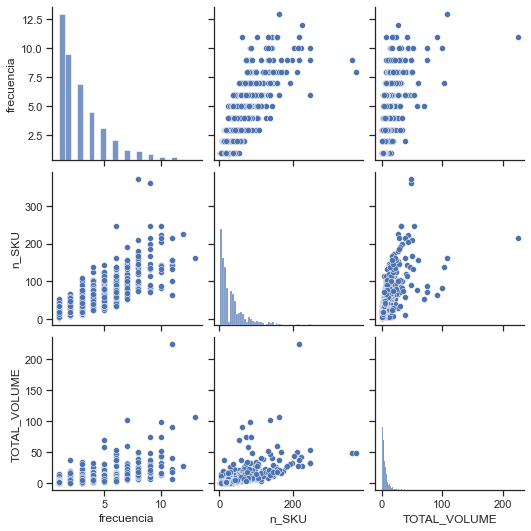

In [ ]:
sns.set_theme(style='ticks')
sns.pairplot(clusters[['frecuencia', 'n_SKU', 'TOTAL_VOLUME']])
#plt.title("Matriz de graficos de dispersión precios normalizados")

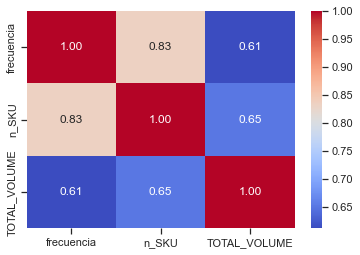

In [ ]:
correlation_matrix = clusters[['frecuencia', 'n_SKU', 'TOTAL_VOLUME']].corr()

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

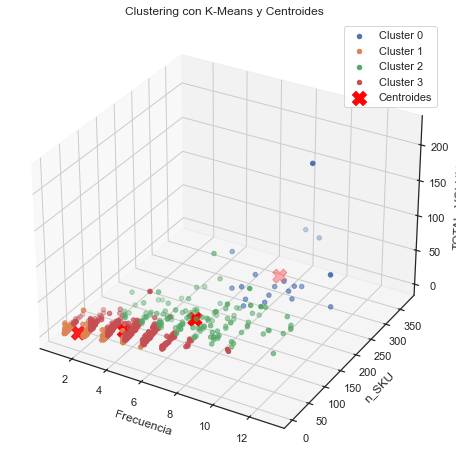

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

features = clusters[['frecuencia', 'n_SKU', 'TOTAL_VOLUME']]

n_clusters = 4  

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo
kmeans.fit(features)

# Añadir las etiquetas de los clusters al DataFrame original
clusters['cluster'] = kmeans.labels_

# Obtener los centroides de los clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['frecuencia', 'n_SKU', 'TOTAL_VOLUME'])

# Graficar en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con colores según los clusters
for cluster in range(n_clusters):
    cluster_points = clusters[clusters['cluster'] == cluster]
    ax.scatter(cluster_points['frecuencia'], cluster_points['n_SKU'], cluster_points['TOTAL_VOLUME'], label=f'Cluster {cluster}')

# Graficar los centroides
ax.scatter(centroids['frecuencia'], centroids['n_SKU'], centroids['TOTAL_VOLUME'], c='red', marker='X', s=200, label='Centroides')

# Etiquetas de los ejes
ax.set_xlabel('Frecuencia')
ax.set_ylabel('n_SKU')
ax.set_zlabel('TOTAL_VOLUME')

# Título del gráfico
ax.set_title('Clustering con K-Means y Centroides')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
centroids

,frecuencia,n_SKU,TOTAL_VOLUME
0,9.157895,223.000000,50.812099
1,1.633714,12.804816,1.946091
2,6.521127,105.535211,19.236030
3,3.655251,44.757991,6.703202


In [ ]:
conteo_clusters = clusters['cluster'].value_counts()

# Mostrar los resultados
print(conteo_clusters)

cluster
1    789
3    438
2    142
0     19
Name: count, dtype: int64


Observar que al ver la ubicacion de los centroides, los grupos 1 y 2 tienen volumenes de compra muy grandes respecto a los del grupo 0 y 3. Ademas, son los grupos menos numerosos 

In [ ]:
lista_0 = list(clusters.loc[clusters.cluster==0]['POC_ID'])
lista_1 = list(clusters.loc[clusters.cluster==1]['POC_ID'])
lista_2 = list(clusters.loc[clusters.cluster==2]['POC_ID'])
lista_3 = list(clusters.loc[clusters.cluster==3]['POC_ID'])


In [ ]:

ven_dic_23_y_prom_g0 = ven_dic_23_y_prom[ven_dic_23_y_prom['POC_ID'].isin(lista_0)]
ven_dic_23_y_prom_g1 = ven_dic_23_y_prom[ven_dic_23_y_prom['POC_ID'].isin(lista_1)]
ven_dic_23_y_prom_g2 = ven_dic_23_y_prom[ven_dic_23_y_prom['POC_ID'].isin(lista_2)]
ven_dic_23_y_prom_g3 = ven_dic_23_y_prom[ven_dic_23_y_prom['POC_ID'].isin(lista_3)]

In [ ]:
# para no repetir los cálculos varias veces, realicé esta funcion para calcular las metricas.

def calculo(df):
    
    num_clientes_df_aceptadas = df.loc[df['ES_PROMOCION']==True].POC_ID.nunique()
    num_clientes_df_aceptadas_g1= df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==1)].POC_ID.nunique()
    num_clientes_df_aceptadas_g0 = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==0)].POC_ID.nunique()
    num_clientes_compras_totales = df.POC_ID.nunique()


    


    #clientes a los que se les ofrecion la promocion

    num_clientes_promocion_g1 = df.loc[df.MEASUREMENT_GROUP==1].POC_ID.nunique()
    num_clientes_promocion_g0 = df.loc[df.MEASUREMENT_GROUP==0].POC_ID.nunique()
    num_clientes_promocion = df.POC_ID.nunique()




    #redenmption rate simple

    rrsimple_g1 = num_clientes_df_aceptadas_g1/num_clientes_promocion_g1
    rrsimple_g0 = num_clientes_df_aceptadas_g0/num_clientes_promocion_g0
    rrsimple_tot = num_clientes_df_aceptadas / num_clientes_promocion




    #volumen medio

    volumen_medio_group_1_o = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].mean()
    volumen_medio_group_0_o = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].mean()
    volumen_medio_sin_promo_o = df.loc[(df['ES_PROMOCION']==False)]['TOTAL_VOLUME'].mean()
    

    #Calculo volumen total
    volumen_total_group_1_o = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==1)]['TOTAL_VOLUME'].sum()
    volumen_total_group_0_o = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==0)]['TOTAL_VOLUME'].sum()
    volumen_total_sin_promo_o = df.loc[(df['ES_PROMOCION']==False)]['TOTAL_VOLUME'].sum()


















    #num de clientes
    num_clientes_redenciones_g1 = df.loc[(df['REDEMPTION']==True)&(df['MEASUREMENT_GROUP']==1)].POC_ID.nunique()
    num_clientes_redenciones_g0 = df.loc[(df['REDEMPTION']==True)&(df['MEASUREMENT_GROUP']==0)].POC_ID.nunique()
    num_clientes_redenciones_aceptadas = df.loc[(df['REDEMPTION']==True)].POC_ID.nunique()
    num_clientes_promociones_aceptadas_g1= df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==1)].POC_ID.nunique()
    num_clientes_promociones_aceptadas_g0 = df.loc[(df['ES_PROMOCION']==True) & (df['MEASUREMENT_GROUP']==0)].POC_ID.nunique()
    num_clientes_promociones_aceptadas = df.loc[df['ES_PROMOCION']==True].POC_ID.nunique()
    num_clientes_compras_totales = df.POC_ID.nunique()

    # num clientes por grupo

    num_clientes_promocion_g1 = promociones.loc[promociones.MEASUREMENT_GROUP==1].POC_ID.nunique()
    num_clientes_promocion_g0 = promociones.loc[promociones.MEASUREMENT_GROUP==0].POC_ID.nunique()
    num_clientes_promocion = promociones.POC_ID.nunique()

    #calculo redemption rate

    redemption_rate_g1 = num_clientes_redenciones_g1/num_clientes_promocion_g1
    redemption_rate_g0 = num_clientes_redenciones_g0/num_clientes_promocion_g0
    redemption_rate_tot = num_clientes_redenciones_aceptadas/num_clientes_promocion
    redemption_rate_REAL_g1 = num_clientes_promociones_aceptadas_g1/num_clientes_promocion_g1
    redemption_rate_REAL_g0 = num_clientes_promociones_aceptadas_g0/num_clientes_promocion_g0
    redemption_rate_REAL = num_clientes_promociones_aceptadas/num_clientes_promocion








    a=[redemption_rate_g1, redemption_rate_g0, redemption_rate_tot, redemption_rate_REAL_g1, redemption_rate_REAL_g0, redemption_rate_REAL, volumen_medio_group_1_o, volumen_medio_group_0_o, volumen_total_group_1_o, volumen_total_group_0_o, volumen_total_sin_promo_o]

    return a

In [ ]:

a=['redemption_rate_g1', 'redemption_rate_g0', 'redemption_rate_tot', 'redemption_rate_REAL_g1', 'redemption_rate_REAL_g0', 'redemption_rate_REAL', 'volumen_medio_group_1', 'volumen_medio_group_0', 'volumen_total_group_1', 'volumen_total_group_0', 'volumen_total_sin_promo']

In [ ]:
g0 = calculo(ven_dic_23_y_prom_g0) 
g1 = calculo(ven_dic_23_y_prom_g1)
g2 = calculo(ven_dic_23_y_prom_g2)
g3 = calculo(ven_dic_23_y_prom_g3)



In [ ]:
resumen = pd.DataFrame({'caracteristicas': a,'ven_dic_23_y_prom_g0': g0, 'ven_dic_23_y_prom_g1': g1, 'ven_dic_23_y_prom_g2': g2, 'ven_dic_23_y_prom_g3': g3})

In [ ]:
resumen

,caracteristicas,ven_dic_23_y_prom_g0,ven_dic_23_y_prom_g1,ven_dic_23_y_prom_g2,ven_dic_23_y_prom_g3
0,redemption_rate_g1,0.003540,0.292920,0.067257,0.192035
1,redemption_rate_g0,0.013274,0.290265,0.058407,0.187611
2,redemption_rate_tot,0.008407,0.291593,0.062832,0.189823
3,redemption_rate_REAL_g1,0.001770,0.030973,0.028319,0.038938
4,redemption_rate_REAL_g0,0.012389,0.033628,0.030088,0.046018
5,redemption_rate_REAL,0.007080,0.032301,0.029204,0.042478
6,volumen_medio_group_1,0.281160,0.622038,1.088494,0.500606
7,volumen_medio_group_0,0.639526,0.597817,0.514915,0.514835
8,volumen_total_group_1,1.405800,28.613760,74.017560,35.042400
9,volumen_total_group_0,51.801600,27.499560,57.670440,47.879640


- La tasa de redencion real en clientes con mayor volumen de compra es mayor en el grupo 1 respecto al grupo 0. En el sector medio, es igual. En clientes con mas bajo nivel de compra es menor.

- El mayor volumen de compra es medio y total, se alcanza con clientes del sector de grandes compradores.


In [ ]:
ventas_dic_22

,POC_ID,ORDER_DATE,SKU,TOTAL_VOLUME,UNIDADES
42,124345,2022-12-28,26560,0.49200,5.0
48,426342,2022-12-05,27583,0.01892,1.0
66,460316,2022-12-15,27139,0.12000,1.0
72,435452,2022-12-15,26813,0.04920,2.0
73,179809,2022-12-15,19019,0.24000,2.0
...,...,...,...,...,...
442581,41993,2022-12-05,26813,0.04920,2.0
442582,387995,2022-12-01,16666,0.12000,1.0
442583,428649,2022-12-16,18361,0.04380,1.0
442584,387995,2022-12-01,27139,0.24000,2.0


## Gracias por leer hasta aqui!